<a href="https://colab.research.google.com/github/jtsuvile/AI_utbildning/blob/main/ML_python_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Maskininlärning med Python**
###**Mål: Bygg en klassificeringmodell för att predicera bröstcancer**

### **Kod & data:**
- URL till original-notebooken: **tinyurl.com/2v2u9y4p**
  - Ladda upp och kör i ert eget google colab-konto
- Vi kommer ladda in ett öppet dataset med data från bröstcancerpatienter. Mer information om datasettet finns [här](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).
  - Datasetet är redan städat, transformerat och bearbetat, så vi kan använda det som det är
  - <font color="red">**OBS! Ladda aldrig upp sekretessbelagd data (t.ex. patientdata) på google colab!**</font>

### **Bra att veta:**
- Kör en specifik kod-cell genom att trycka på play-knappen i övre vänstra hörnet av cellen
  - Kom ihåg att ordningen som du kör cellerna i spelar roll, om det finns kod i cell A som behövs i cell B så behöver du köra A före B
  - Om kod i cell B skriver över variabler i cell A, så kommer det påverka vad som händer om du kör A igen



## Steg 1: prep
Vi preppar notebooken med paket och data vi kommer behöva under övningen

In [69]:
#Först importerar vi de paket vi behöver:

import pandas as pd # pandas är bra för att hantera tabulärdata
import matplotlib.pyplot as plt # matplotlib är för att göra snygga plottar
from sklearn import datasets # sklearn har mycket ML-relaterat, här importerar vi funktionen som ger oss datasets
from sklearn.model_selection import train_test_split # och här lite funktioner vi kommer behöva

pd.options.display.max_columns = None  # Ställer in så pandas dataframes inte kollapsar (döljer) kolumner när vi skriver ut en tabell
plt.rcParams['figure.figsize'] = [20, 10]


In [70]:
# vi laddar in datasettet

X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)    # Laddar X- och y-data
# X innehåller alla variabler som vi vill använda som input vid prediktion
# Y innehåller den variabel som är vår modells "target", d.v.s det modellen predicerar
y = y.apply(lambda x: datasets.load_breast_cancer().target_names[x])  # Lägger till etiketter till y-data


---
## Steg 2: Bekanta er med datasetet

Vi har laddat in data som en DataFrame, dvs en excel-liknande tabell. Paketet Pandas (alias pd) som vi laddade innan har en hel del bra funktioner som hjälper med att förstå och hantera en DataFrame.


In [72]:
# Första frågan är alltid: hur ser datan ut?
X.head() # kommandot head() ger 5 första rader av en DataFrame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
# vi kan även fråga vad har vi för kolumner?
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [74]:
# vi kollar även på y
y.head()

0    malignant
1    malignant
2    malignant
3    malignant
4    malignant
Name: target, dtype: object

### Reflektion

Vad märker du med kolumnnamn? Är det någon/några termer som upprepas ofta? Vad tror vi det handlar om?

Mer information om datasettet hittar du t.ex. [här](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).


### Vi fortsätter utreda data

Vi fortsätter försöka förstå vår dataset genom att utnyttja Pandas functions.

In [75]:
# Vilka kategorier har vi i y? Hur många av varje?
y.value_counts()

benign       357
malignant    212
Name: target, dtype: int64

In [76]:
# hur kan vi sammanfatta variabler i X? ja, det finns en enkel funktion för det!
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


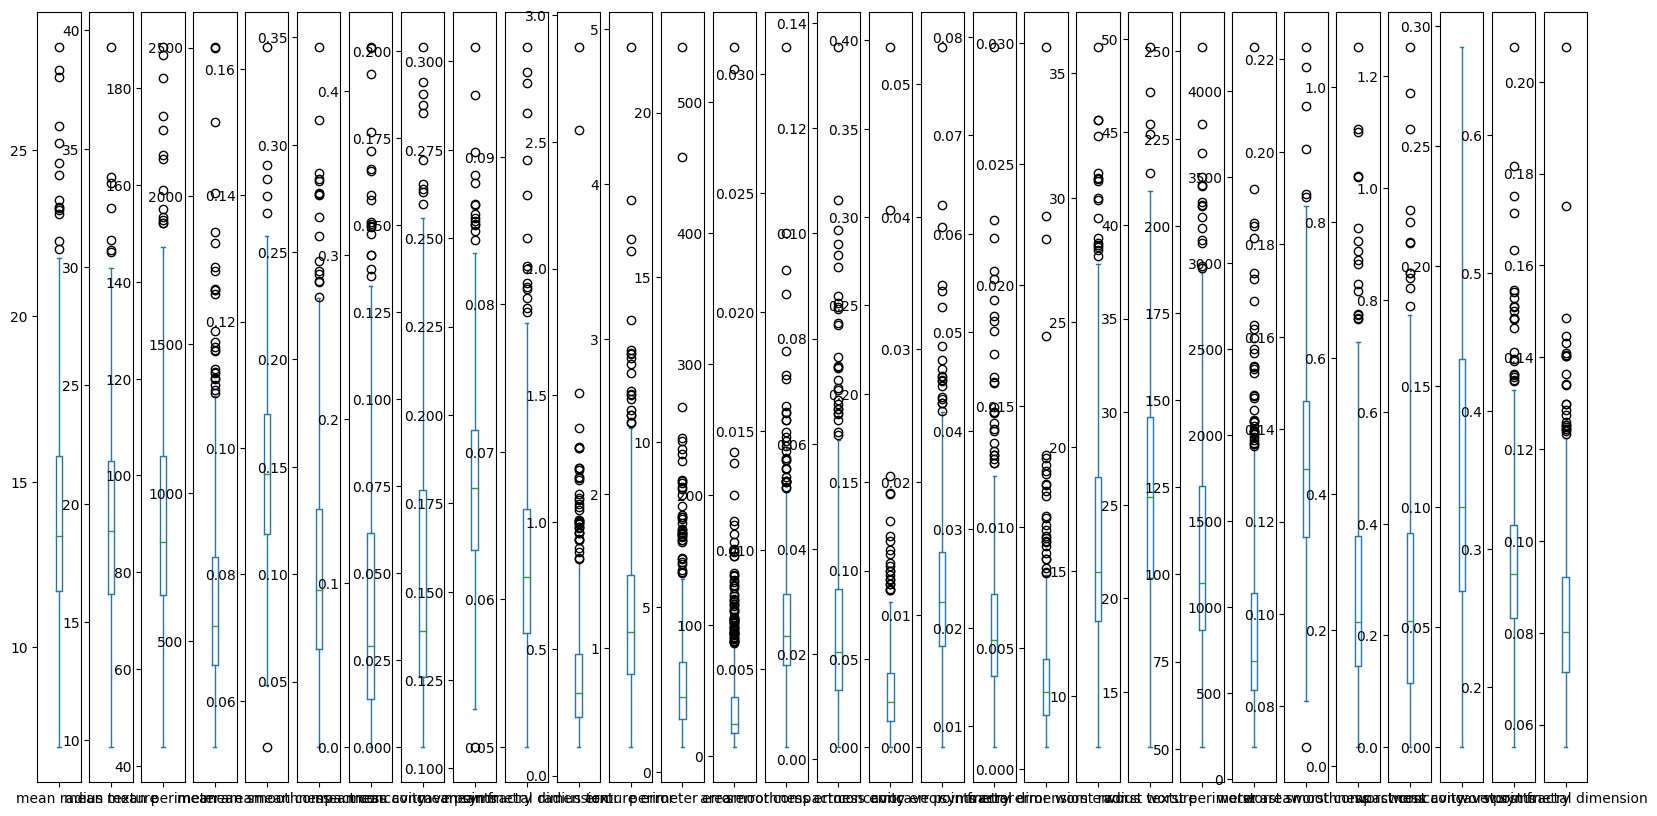

In [77]:
# men usch det är jobbigt att kolla på siffror på det sättet. Hade det varit enklare att förstå en bild?
X.plot.box(subplots=True)
plt.show() # in order for the plot to show on the notebook, you need to always call plt.show after creating a plot

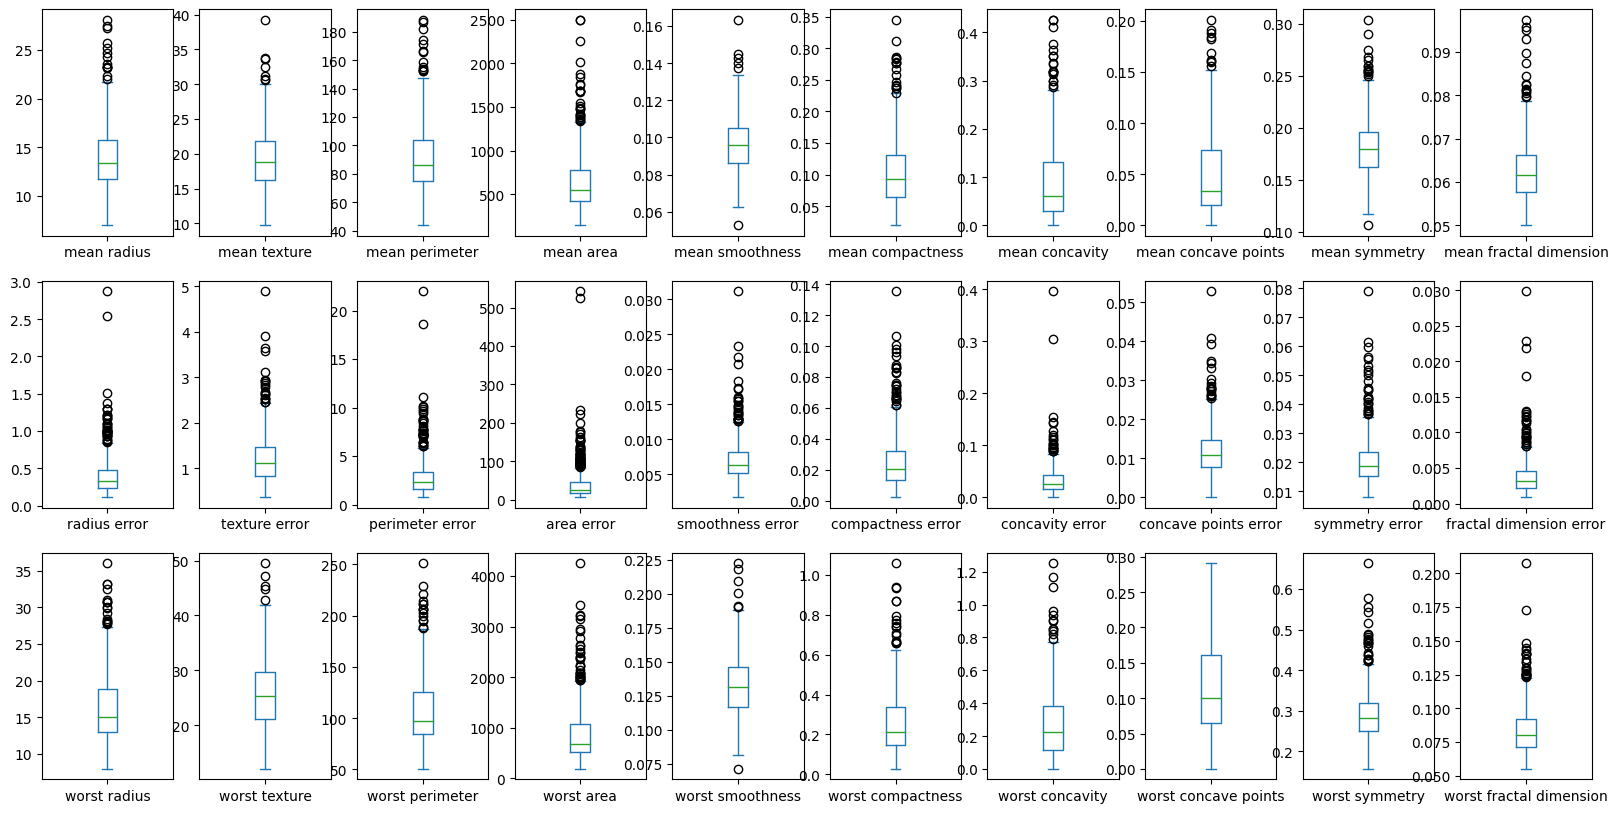

In [78]:
# det var lite bra men inte helt och hållet. Vi fortsätter utveckla plottet för att det ska vara lite mer informativt!
# normalt hade du fortsätt genom att ändra den befintliga koden och bara kört om cellen, men för att vara pedagogiska kommer vi göra det steg för steg

# vi lägger in en arguemnt som heter "layout", den hjälper oss få plottarna lite tydligare
X.plot.box(subplots=True, legend=False, layout=(3, 10))
plt.show()
# blev det bättre? känn dig fri att ändra på antal (rader, kolumner) i layout för att hitta vad som känns rimligt för dig

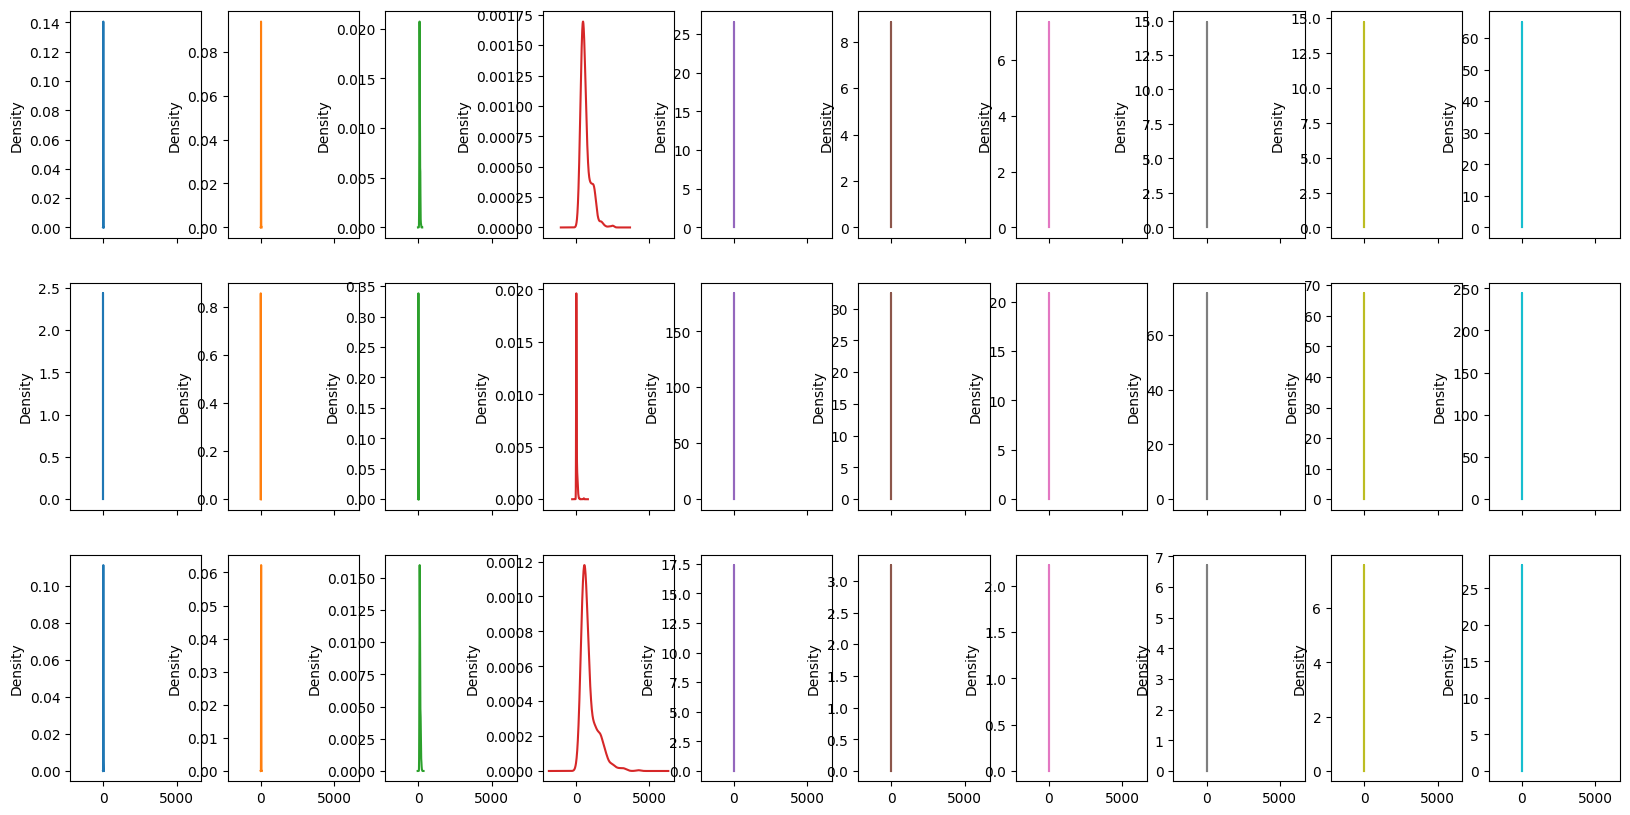

In [101]:
# vi kan även leka lite med plottyp
# alla möjliga typer finns här https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
# men alla kommer inte se lika snygga ut!
X.plot.density(subplots=True, layout=(3, 10), legend=False)
plt.show()

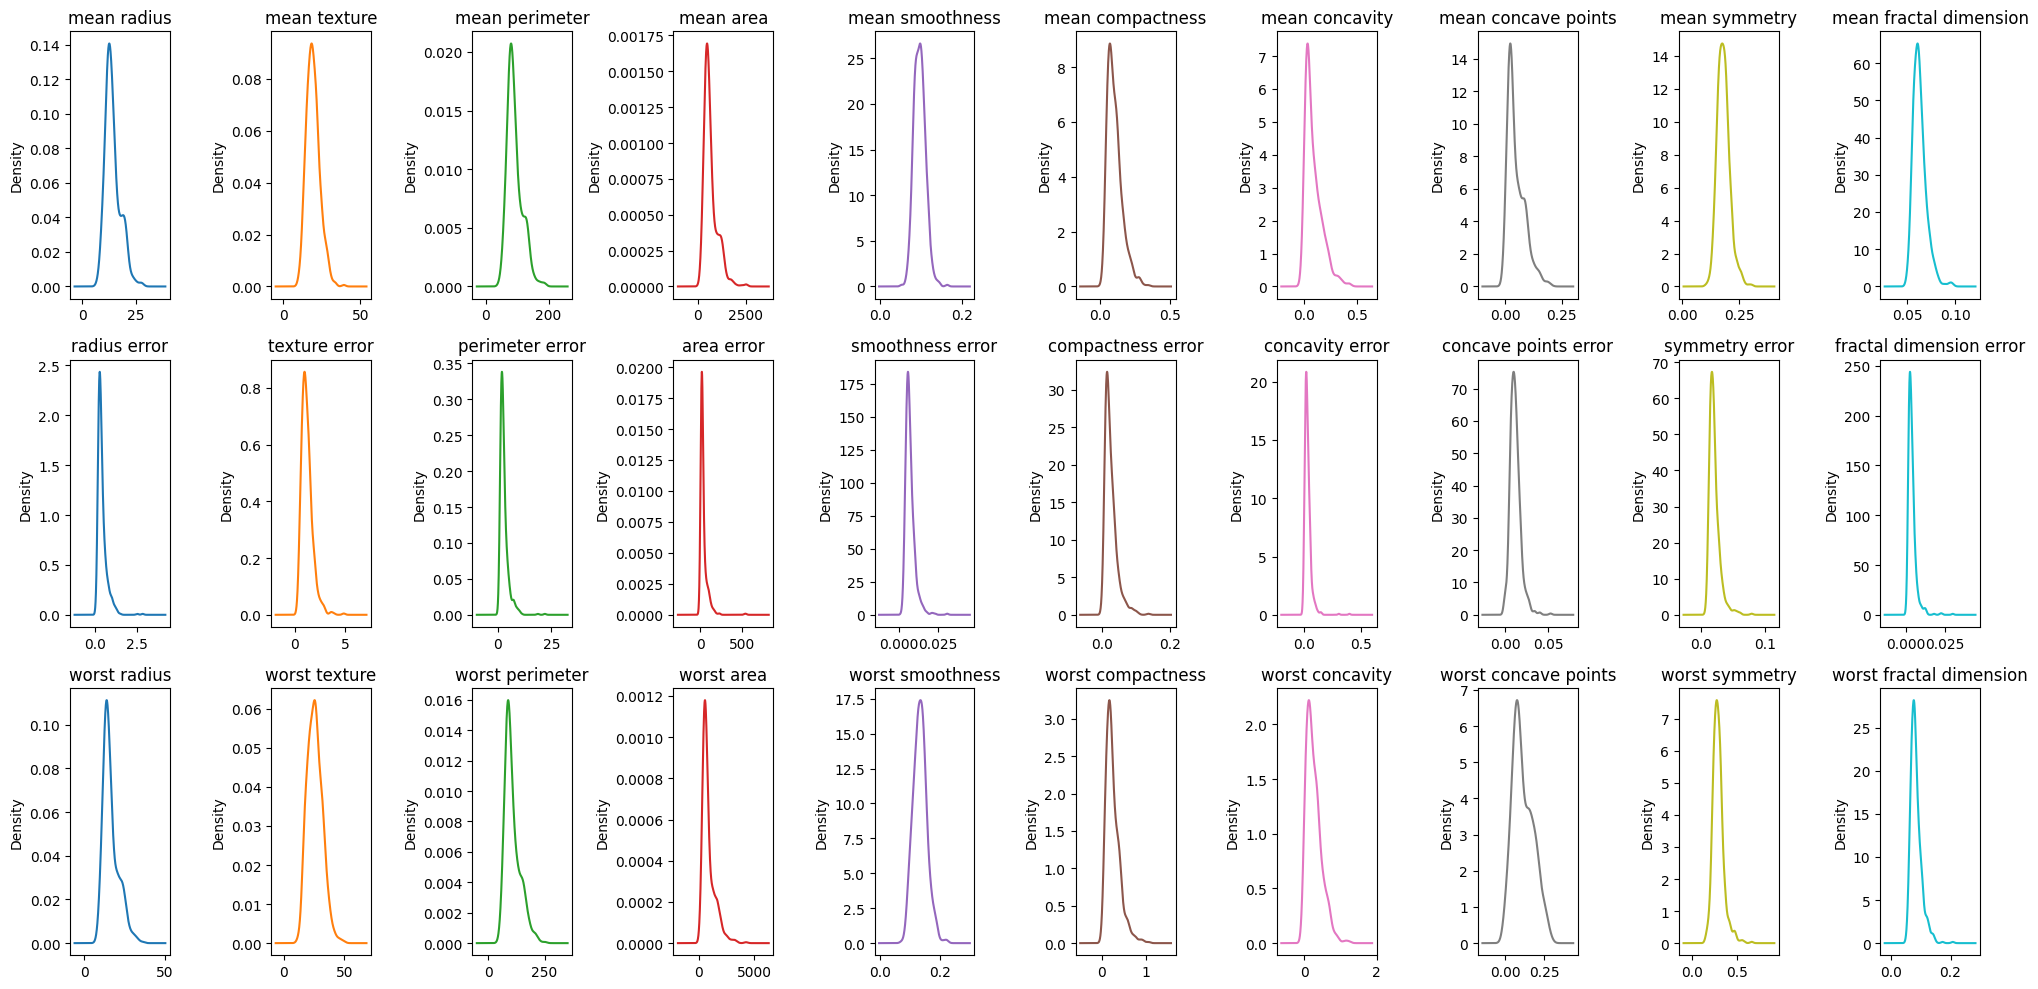

In [105]:
 # beroende på plottyp vill vi använda lite olika argument för att det ska bli bra
X.plot.density(subplots=True, layout=(3, 10), legend=False, sharex=False,
               title=X.columns.tolist())
plt.tight_layout()
plt.show()

In [128]:
# vi kan även kolla på variabler två och två med hjälp av korrelationsmatris
X.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


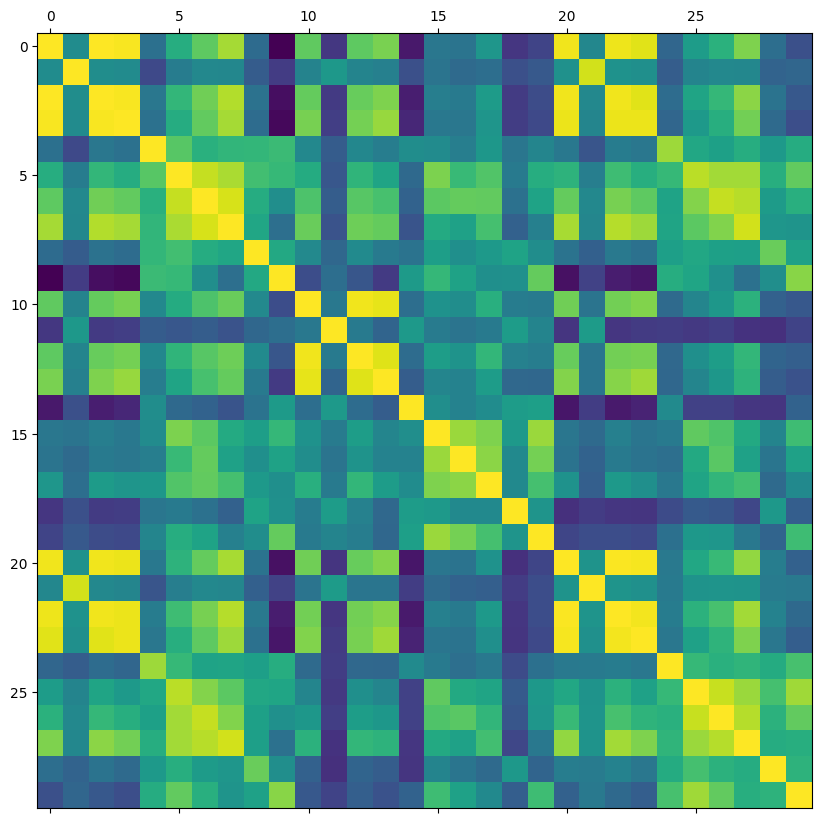

In [129]:
# oj nej massa siffror igen, svårt att kolla igenom dem om de är i numerisk format.
# vi gör ett plot av det istället
plt.matshow(X.corr())
plt.show()

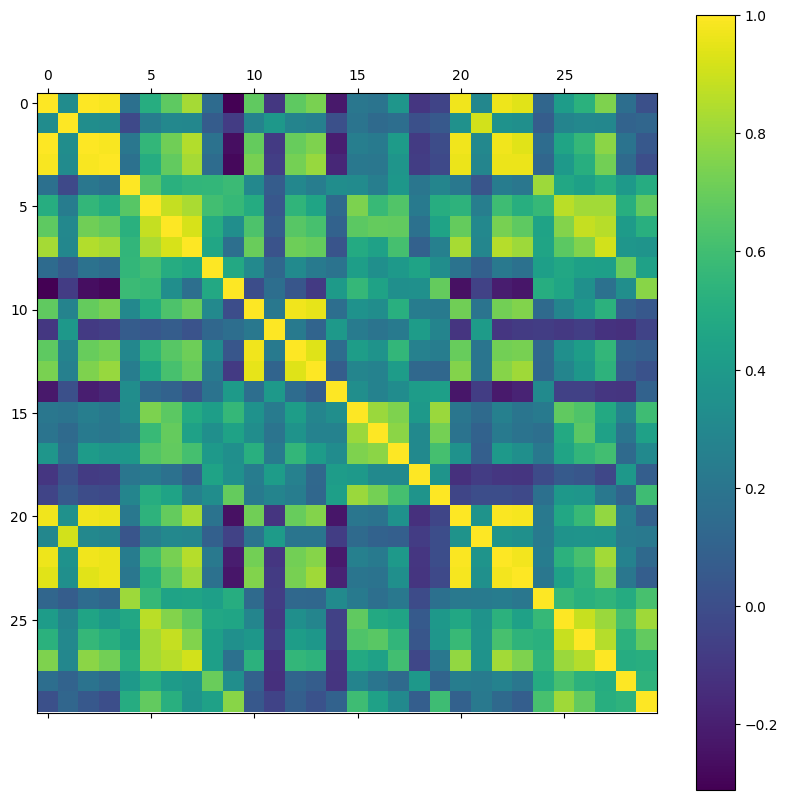

In [130]:
# det var bättre men det är svårt att veta vilken siffra motsvarar vilken färg
# så vi lägger in en colorbar
p1 = plt.matshow(X.corr())
plt.colorbar(p1)
plt.show()

### Reflektion

Innan vi kan gå vidare till maskinlärning, det är viktigt att vi förstår om det är någonting i datasettet som känns konstigt eller som behöver hanteras. Är variabler kategoriska eller numeriska? Om du inte kommer ihåg var det innebär med kategoriska och numeriska variabler, känn dig fri att fråga chattboten (och sen verifiera från någon annan källa). Har alla samma skala? Är det mycket outliers? Finns det några värden som korrelerar mycket starkt med varandra (r > 0.9 eller så)?

---
## Steg 3: Dela upp test och train
I maskininlärning är det otroligt viktigt att testdata inte får läcka sig in i träningsstadiet. För att undvika detta, vill vi dela upp datasettet i test och train innan vi börjar göra något vidare med det.

In [104]:
# Dela upp dataset till träning- och testdata
# X_train och y_train är data som ska användas vid träning av modellen
# X_test och y_test är data som ska användas vid utvärdering av modellen
# att vi explicit sätter random state gör så att vi alla kommer få samma individer i test och train
# vilket gör det enklare att troubleshootta och debugga om det behövs!

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)

### Reflektion
Varför är det dåligt om testdata läcker in i träningsdata? Om detta inte känns självklart, fråga gärna chattboten (och verifiera svar från någon annan källa)!

----
## Steg 4: Standardisering av X-data

En problem vi kan ha upptäckt är att variabler har väldigt olika storleksgrad. Det klarar inte alla maskininlärningsalgoritmer av. Därför vill vi standardisera våra numeriska variabler innan vi tränar modellen.

Standardisering gör det dessutom lättare att tolka samband och jämföra variabler mot varandra. Standardiserad data har följande egenskaper:
- medelvärde=0
- standardavvikelse=1

Vi använder `StandardScaler()` för att standardisera vår numeriska X-data (vi standardiserar inte y-datan eftersom den är kategorisk).

Notera att det finns olika typer av skalning för olika situationer, neurala nätverk använder t.ex. oftast `MinMaxScaler` istället för `StandardScaler`, som normaliserar data så att alla datapunkter hamnar inom spannet 0 och 1.


In [110]:
from sklearn.preprocessing import StandardScaler

# Definiera vår scaler
scaler = StandardScaler()

# Vi tränar scalern enbart på träningsdata
X_train_scaled = scaler.fit_transform(X_train)

# Vi tillämpar scalern även på testdata
X_test_scaled = scaler.transform(X_test)


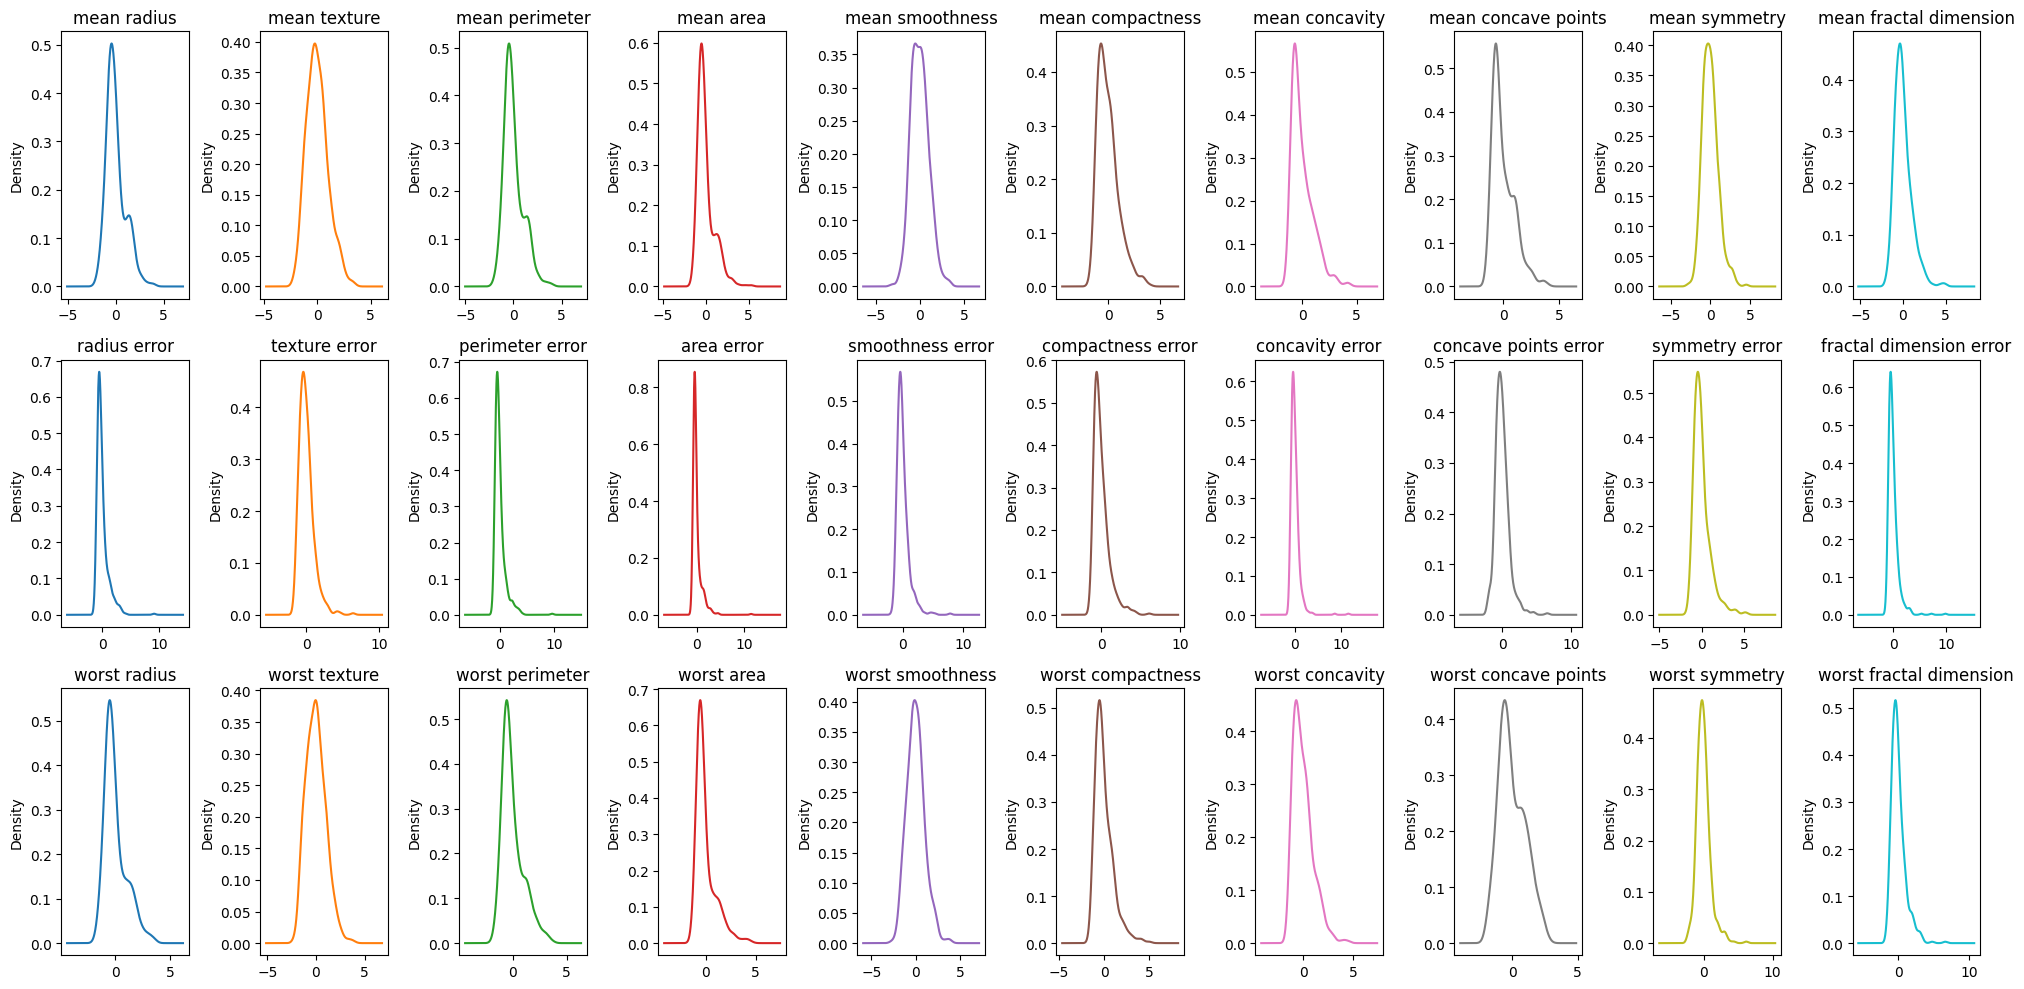

In [133]:
# vi kan kolla visuellt vad har hänt med våra distributioner efter scalern
# kolla noga på x-axis!
pd.DataFrame(X_train_scaled).plot.density(subplots=True, layout=(3, 10), legend=False, sharex=False,
               title=X.columns.tolist())
plt.tight_layout()
plt.show()

---
# Steg 5: Träning och prediktion (nu är det äntligen ML!!)

Vi ska använda den skalade träningsdatan för att träna en modell, och sedan den skalade testdatan för att ta fram prediktioner.

Slutligen så ska vi räkna ut en confusion matrix där vi kan se hur många av de predicerade värdena för respektive utfall som faktiskt var korrekta enligt "facit"

**Uppgifter**:
1. Definiera en logistik regressionsmodell enligt: `model = <modell som vi har importerat>()`
  <details><summary>Hint</summary>Titta på vilken modell vi importerar</details>
  <details><summary>Lösning</summary>model = LogisticRegression()</details>
2. Träna modellen med träningsdata enligt: `model.fit(<X-data>, <y-data>)`
  <details><summary>Hint</summary>Använd aldrig testdata för att träna en modell och kom ihåg att använda skalad X-data</details>
  <details><summary>Lösning</summary>model.fit(X_train_scaled, y_train)</details>
3. Predicera med testdata enligt: `model.predict(<X-data>)`
  <details><summary>Hint</summary>Använd den skalade testdatan för att predicera</details>
  <details><summary>Lösning</summary>model.predict(X_test_scaled)</details>
4. Ta fram en confusion matrix enligt: `confusion_matrix(<sann y-data>, <predicerad y-data>)`
  <details><summary>Hint</summary>Använd facit-data och de prediktioner vi fått ut</details>
  <details><summary>Lösning</summary>cm = confusion_matrix(y_test, y_pred)</details>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# 3.1. Välj modelltyp
model = LogisticRegression()

# 3.2 Träna modell
model.fit(X_train_scaled, y_train)

# 3.3 Gör prediktioner
y_pred = model.predict(X_test_scaled)

# 3.4 Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=["predicted_benign", "predicted_maglignant"], index=["actually_benign", "actually_malignant"])
display(cm)

,predicted_benign,predicted_maglignant
actually_benign,144,0
actually_malignant,9,75



Data är laddad som pandas DataFrames, vilket innebär att data struktureras som tabeller med kolumner och rader
- pandas (alias pd) har inbyggda funktioner som kan användas för att hantera dataseten
- Om ni t.ex. skriver `X_train.head()` så ser ni de fem första raderna i X_train-datasetet

**Uppgifter**:
1. Skriv `y_train.value_counts()` för att räkna hur många fall som hade utfallet "benign" respektive "malignant"
2. Skriv `X_train.head()` eller `X_train.tail()` för att visa de fem första/sista raderna
  - Vill ni t.ex. visa 10 rader så kan ni skriva `X_train.head(10)`
3. Använd `.describe()` på `X_train` för att få en sammanfattning av datasetet
4. Använd `.corr()` på `X_train` för att ta fram en korrelationsmatris


---
# Övning 4 - Utvärdera modellen

Vi kan tolka modellen utifrån ett antal olika mått. I det här fallet så kommer vi inspektera confusion matrix, samt beräkna accuracy.
- Notera att accuracy kan vara missvisande när datan i y är väldigt obalanserad (t.ex. om nästan alla fall har samma utfall) - vi kommer inte titta på det nu, men bra att känna till

**Uppgifter:**
1. Räkna ut `accuracy` (andel korrekta prediktioner)
  <details><summary>Hint</summary>accuracy = korrekta prediktioner / alla prediktioner</details>
  <details><summary>Lösning</summary>accuracy = number_of_correct_predictions / number_of_predictions </details>
2. Försök tolka `accuracy` och confusion matrix (`cm`)
  - Hur väl verkar modellen prestera överlag?
  - Jämför resultatet för de två utfallen "malignant" och "benign" i confusion matrix, verkar modellen vara bra på att predicera båda utfallen?


In [ ]:
# 4.1. Beräkna accuracy
number_of_correct_predictions = sum(y_test == y_pred)
number_of_predictions = len(y_pred)
accuracy = number_of_correct_predictions / number_of_predictions
print(f"{accuracy=:.2f}")

# 4.2. Tolka accuracy och confusion matrix
display(cm)

"""
<skriv din tolkning här>



""";

accuracy=0.96


,predicted_benign,predicted_maglignant
actually_benign,144,0
actually_malignant,9,75


---
# Övning 6 - Fri lek

Har ni tid över så kan ni testa på att jobba med data/modeller helt själva.

**Förslag**:
- Hitta fler pandas-funktioner här: [Pandas CheatSheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- Hitta fler sklearn-funktioner här: [sklearn CheatSheet](https://res.cloudinary.com/dyd911kmh/image/upload/v1676302389/Marketing/Blog/Scikit-Learn_Cheat_Sheet.pdf)
- Räkna ut fler utvärderingsmått - presterar modellen bra enligt alla mått?
  - `precison = true_positive / (true_positive + false_positive)`
  - `recall = true_positive / (true_positive + false_negative)`
  - `f1 = 2 * (precision * recall) / (precision + recall)`
- Gå t.ex. till [sklearn.datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) och hitta fler slags modeller att träna
  - Notera att vilken y-variabel du väljer påverkar vilken slags modell du kan använda; kategoriska y-variabler kräver en modeller av typen "classification", medan numeriska y-variabler kräver modeller av typen "regression" (inte att förväxla med regressionsmodell)
- Gå t.ex. till [sklearn.linear_model](https://scikit-learn.org/stable/modules/linear_model.html) och hitta flera dataset att analysera

In [ ]:
# Vi kan använda pandas för att skapa nya tabeller och en massa annat
outcomes = pd.DataFrame()                                            # Skapar en tom dataframe
outcomes["count"] = y_train.value_counts()                           # Ny kolumn som består av value_counts() för y
outcomes["proportion"] = round(outcomes["count"] / len(y_train), 2)  # Ny kolumn där vi delar count med antalet rader i y_train
outcomes["percent"] = outcomes["proportion"] * 100                   # Ny kolumn där vi räknar om proportion till procent
outcomes.loc["total"] = outcomes.apply(sum)                          # Ny rad där vi summerar kolumnernas värden
display(outcomes)                                                    # Visar vår nya tabell

# Vi kan skriva ut rader, kolumner och celler för sig
counts = dict(outcomes["count"])      # Kolumnen count
totals = dict(outcomes.loc["total"])  # Raden total
benign = outcomes["count"]["benign"]  # Cellen [count, benign]

print(f"{counts = }")
print(f"{totals = }")
print(f"{benign = }")

In [ ]:
# Vi kan även spara dataframe som .csv, .excel och liknande format
# Notera: I vänsterfliken i google colab finns en tab som heter "Files" där filer sparas/läses från
outcomes.to_csv("outcomes.csv")

# Samt ladda in från .csv, m.fl
outcomes = pd.read_csv("outcomes.csv", index_col=0)
display(outcomes)
